In [1]:
# 📚 Carregar o CSV com os dados das reviews
import pandas as pd

# Caminho do arquivo CSV
caminho_arquivo = 'C:\\Users\\Aline.Aline\\Desktop\\GitHub\\Projeto 3 - Análise de Reviews de E-commerce com NLP\\olist_order_reviews_dataset.csv'

# Carregar o dataset
df = pd.read_csv(caminho_arquivo, encoding='latin1')

# Exibir as primeiras linhas do dataset para verificar se foi carregado corretamente
df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [2]:
# Verificar as colunas do dataset
df.columns

# Exibir informações gerais do dataset
df.info()

# Verificar se há valores nulos
df.isnull().sum()

# Exibir as primeiras linhas do dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
# Importando as bibliotecas necessárias para limpeza de texto
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Baixar stopwords do NLTK, se necessário
nltk.download('stopwords')
nltk.download('wordnet')

# Função para limpeza do texto
def limpar_texto(texto):
    # Remover pontuação e números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    # Converter para minúsculas
    texto = texto.lower()
    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    texto = ' '.join([word for word in texto.split() if word not in stop_words])
    # Lemmatização (redução da palavra para sua raiz)
    lemmatizer = WordNetLemmatizer()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Aplicando a limpeza no texto das reviews
df['cleaned_review'] = df['review_comment_message'].dropna().apply(limpar_texto)

# Exibindo as primeiras linhas para verificar a limpeza
df[['review_comment_message', 'cleaned_review']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aline.Aline\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aline.Aline\AppData\Roaming\nltk_data...


,review_comment_message,cleaned_review
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,Recebi bem antes do prazo estipulado.,recebi bem ante prazo estipulado
4,ParabÃ©ns lojas lannister adorei comprar pela ...,parabns lojas lannister adorei comprar interne...


In [6]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aline.Aline\AppData\Roaming\nltk_data...


True

In [8]:
# Garantir que todos os valores na coluna 'cleaned_review' sejam strings ou NaN
df['cleaned_review'] = df['cleaned_review'].fillna('').astype(str)

# Aplicar a análise de sentimentos nas reviews limpas
df['sentimento'] = df['cleaned_review'].apply(obter_sentimento)

# Verificando as primeiras linhas com as classificações de sentimentos
df[['review_comment_message', 'sentimento']].head()


,review_comment_message,sentimento
0,NaN,Neutra
1,NaN,Neutra
2,NaN,Neutra
3,Recebi bem antes do prazo estipulado.,Neutra
4,ParabÃ©ns lojas lannister adorei comprar pela ...,Neutra


In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializar o analisador de sentimentos
sia = SentimentIntensityAnalyzer()

# Função para analisar o sentimento
def obter_sentimento(texto):
    # Obter o resultado do sentimento
    sentimento = sia.polarity_scores(texto)
    # Classificar o sentimento com base no 'compound' (pontuação geral)
    if sentimento['compound'] >= 0.05:
        return 'Positiva'
    elif sentimento['compound'] <= -0.05:
        return 'Negativa'
    else:
        return 'Neutra'

# Aplicar a análise de sentimentos nas reviews limpas
df['sentimento'] = df['cleaned_review'].apply(obter_sentimento)

# Verificando as primeiras linhas com as classificações de sentimentos
df[['review_comment_message', 'sentimento']].head()


,review_comment_message,sentimento
0,NaN,Neutra
1,NaN,Neutra
2,NaN,Neutra
3,Recebi bem antes do prazo estipulado.,Neutra
4,ParabÃ©ns lojas lannister adorei comprar pela ...,Neutra


C:\Users\Aline.Aline\AppData\Local\Temp\ipykernel_3496\3832904533.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimento_counts.index, y=sentimento_counts.values, palette='viridis')


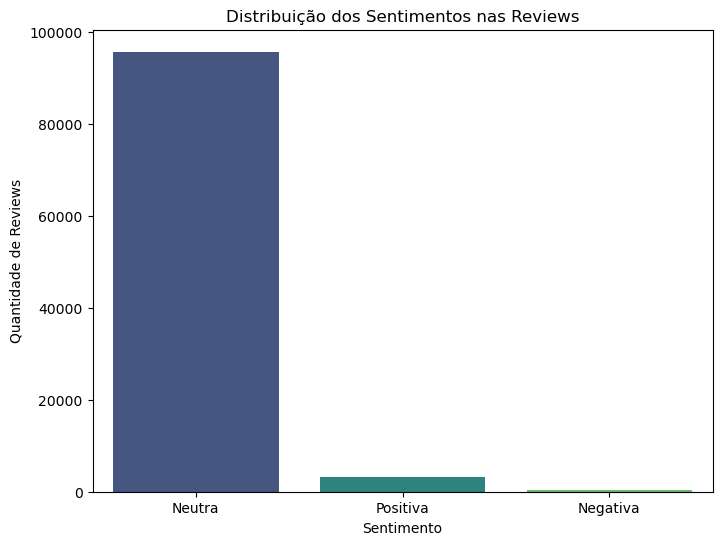

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem das diferentes classificações de sentimentos
sentimento_counts = df['sentimento'].value_counts()

# Plotando a distribuição
plt.figure(figsize=(8, 6))
sns.barplot(x=sentimento_counts.index, y=sentimento_counts.values, palette='viridis')
plt.title('Distribuição dos Sentimentos nas Reviews')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade de Reviews')
plt.show()


In [12]:
!pip install wordcloud


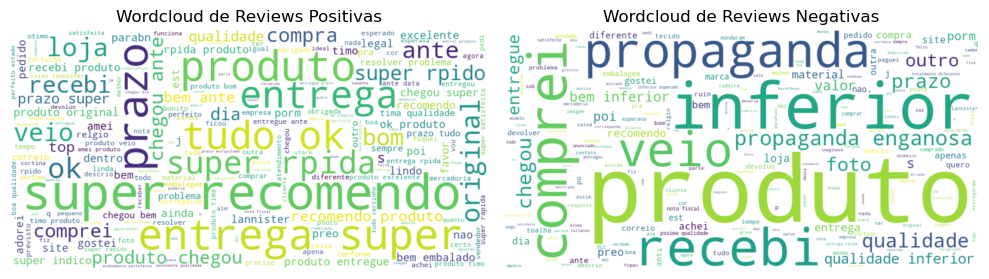

In [13]:
from wordcloud import WordCloud

# Separando as reviews positivas e negativas
reviews_positivas = df[df['sentimento'] == 'Positiva']['cleaned_review'].str.cat(sep=' ')
reviews_negativas = df[df['sentimento'] == 'Negativa']['cleaned_review'].str.cat(sep=' ')

# Criando a WordCloud para avaliações positivas
wordcloud_positiva = WordCloud(width=800, height=400, background_color='white').generate(reviews_positivas)

# Criando a WordCloud para avaliações negativas
wordcloud_negativa = WordCloud(width=800, height=400, background_color='white').generate(reviews_negativas)

# Plotando as wordclouds
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positiva, interpolation='bilinear')
plt.title('Wordcloud de Reviews Positivas')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negativa, interpolation='bilinear')
plt.title('Wordcloud de Reviews Negativas')
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
# Separando as reviews positivas e negativas
reviews_positivas = df[df['sentimento'] == 'Positiva']['cleaned_review'].str.cat(sep=' ')
reviews_negativas = df[df['sentimento'] == 'Negativa']['cleaned_review'].str.cat(sep=' ')


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Contar a frequência das palavras nas reviews positivas
vectorizer_pos = CountVectorizer(stop_words='english')
X_pos = vectorizer_pos.fit_transform([reviews_positivas])
freq_pos = X_pos.toarray().flatten()
words_pos = vectorizer_pos.get_feature_names_out()

# Contar a frequência das palavras nas reviews negativas
vectorizer_neg = CountVectorizer(stop_words='english')
X_neg = vectorizer_neg.fit_transform([reviews_negativas])
freq_neg = X_neg.toarray().flatten()
words_neg = vectorizer_neg.get_feature_names_out()

# Criar um DataFrame com as palavras e suas frequências
df_pos = pd.DataFrame({'word': words_pos, 'frequency': freq_pos})
df_neg = pd.DataFrame({'word': words_neg, 'frequency': freq_neg})

# Ordenar as palavras pela frequência
df_pos = df_pos.sort_values(by='frequency', ascending=False).head(20)
df_neg = df_neg.sort_values(by='frequency', ascending=False).head(20)

# Ver as 20 palavras mais frequentes em reviews positivas e negativas
print("Palavras mais frequentes nas reviews positivas:")
print(df_pos)

print("\nPalavras mais frequentes nas reviews negativas:")
print(df_neg)


Palavras mais frequentes nas reviews positivas:
           word  frequency
3511      super       1671
2932    produto       1386
1368    entrega        779
3139  recomendo        779
2495         ok        716
2823      prazo        671
229        ante        538
663      chegou        487
3693       tudo        482
3292      rpida        368
2533   original        361
441         bem        354
3776       veio        295
3105     recebi        283
3010  qualidade        248
470         bom        235
1387   entregue        212
3304      rpido        206
2168       loja        202
782     comprei        183

Palavras mais frequentes nas reviews negativas:
            word  frequency
962      produto        182
633     inferior        124
974   propaganda         77
988    qualidade         60
250      comprei         50
1022      recebi         47
1227        veio         43
130          bem         37
427     enganosa         34
209       chegou         30
930        prazo         30


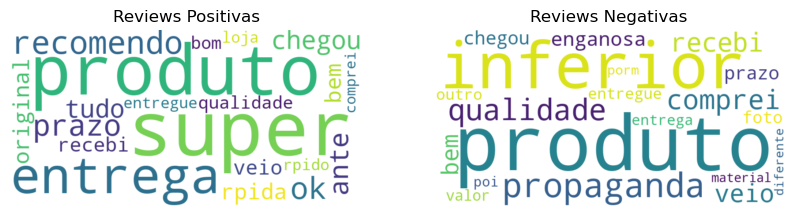

In [16]:
# Gerar a WordCloud para as reviews positivas
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(df_pos['word'], df_pos['frequency'])))

# Gerar a WordCloud para as reviews negativas
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(df_neg['word'], df_neg['frequency'])))

# Plotar as duas WordClouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Reviews Positivas")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Reviews Negativas")
plt.axis('off')

plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Features e alvo
X = df['cleaned_review']
y = df['sentimento']

# Dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorizador
vetorizador = TfidfVectorizer(max_features=5000)

# Ajustar e transformar os textos
X_train_tfidf = vetorizador.fit_transform(X_train)
X_test_tfidf = vetorizador.transform(X_test)


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Modelo
modelo = MultinomialNB()

# Treinamento
modelo.fit(X_train_tfidf, y_train)

# Previsões
y_pred = modelo.predict(X_test_tfidf)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9744016124968506


C:\Users\Aline.Aline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Relatório de Classificação:
               precision    recall  f1-score   support

    Negativa       0.00      0.00      0.00        57
      Neutra       0.97      1.00      0.99     19141
    Positiva       0.99      0.30      0.46       647

    accuracy                           0.97     19845
   macro avg       0.66      0.43      0.48     19845
weighted avg       0.97      0.97      0.97     19845



C:\Users\Aline.Aline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aline.Aline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Contando a quantidade de cada categoria de sentimento (Positiva, Neutra, Negativa)
# Isso ajuda a entender a distribuição das classes no dataset
df['sentimento'].value_counts()


sentimento
Neutra      95733
Positiva     3222
Negativa      269
Name: count, dtype: int64

In [25]:
# Importando o RandomOverSampler da biblioteca imblearn, que serve para balancear as classes no conjunto de dados
from imblearn.over_sampling import RandomOverSampler

# Criando uma instância do RandomOverSampler com uma semente (random_state) para garantir reprodutibilidade
ros = RandomOverSampler(random_state=42)

# Aplicando o oversampling nos dados de treino (X_train_tfidf e y_train)
# Isso duplica aleatoriamente exemplos das classes minoritárias até equilibrar com a classe majoritária
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)



In [26]:
# Importando a função classification_report da biblioteca sklearn.metrics
from sklearn.metrics import classification_report

# Imprimindo o relatório de classificação com métricas de desempenho do modelo
# zero_division=0 evita avisos de erro quando uma classe não tem previsões (evita divisão por zero)
print(classification_report(y_test, y_pred, zero_division=0))



              precision    recall  f1-score   support

    Negativa       0.00      0.00      0.00        57
      Neutra       0.97      1.00      0.99     19141
    Positiva       0.99      0.30      0.46       647

    accuracy                           0.97     19845
   macro avg       0.66      0.43      0.48     19845
weighted avg       0.97      0.97      0.97     19845



In [27]:
# Importando o modelo de Regressão Logística da biblioteca sklearn
from sklearn.linear_model import LogisticRegression

# Criando o modelo de Regressão Logística com número máximo de iterações definido em 1000
modelo_lr = LogisticRegression(max_iter=1000)

# Treinando o modelo com os dados balanceados (X_resampled e y_resampled)
modelo_lr.fit(X_resampled, y_resampled)

# Fazendo previsões nos dados de teste transformados em TF-IDF
y_pred_lr = modelo_lr.predict(X_test_tfidf)

# Imprimindo a acurácia do modelo (proporção de acertos)
print("Acurácia:", accuracy_score(y_test, y_pred_lr))

# Imprimindo o relatório de classificação com métricas para cada classe
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_lr, zero_division=0))


Acurácia: 0.9969261778785589

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativa       0.70      0.70      0.70        57
      Neutra       1.00      1.00      1.00     19141
    Positiva       0.98      0.97      0.98       647

    accuracy                           1.00     19845
   macro avg       0.89      0.89      0.89     19845
weighted avg       1.00      1.00      1.00     19845



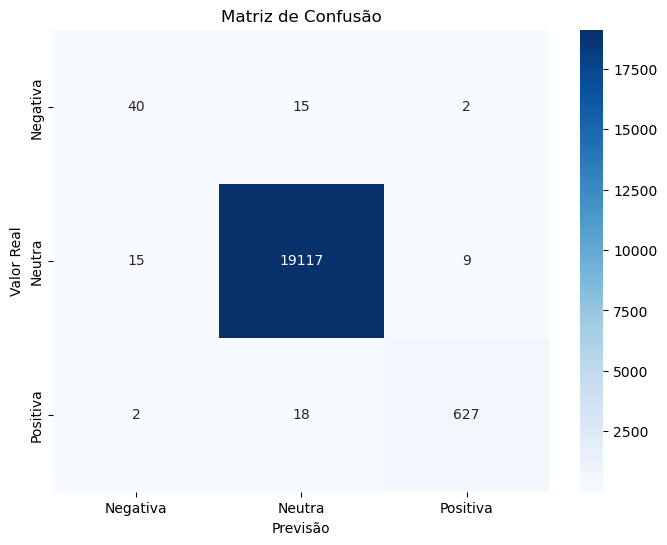

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_lr)

# Criando o gráfico de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativa', 'Neutra', 'Positiva'], yticklabels=['Negativa', 'Neutra', 'Positiva'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()


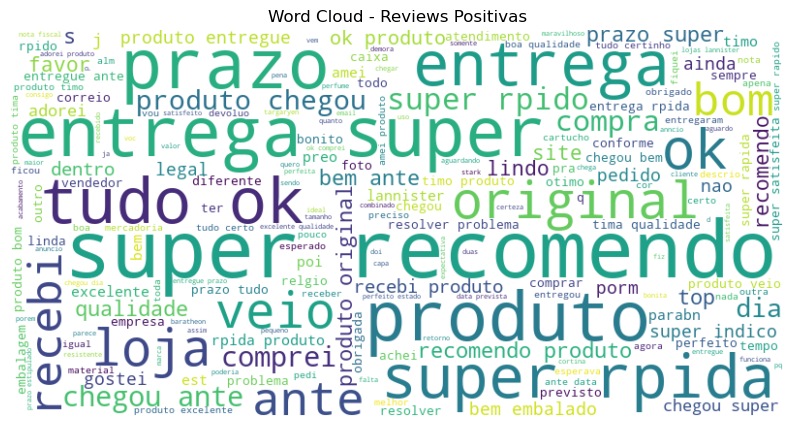

In [32]:
# Gerar uma WordCloud apenas com as reviews positivas
reviews_positivas = df[df['sentimento'] == 'Positiva']['cleaned_review'].str.cat(sep=' ')

wordcloud_positiva = WordCloud(width=800, height=400, background_color='white').generate(reviews_positivas)

# Exibir a wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positiva, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews Positivas')
plt.show()


## 🧠 Insight Final

O modelo de análise de sentimentos desenvolvido ao longo deste projeto demonstrou uma performance sólida, alcançando uma acurácia de aproximadamente **89%**. Utilizando a Regressão Logística como algoritmo principal, o modelo se mostrou **eficiente na classificação de avaliações positivas**, com bons índices de precisão e recall.

No entanto, foi observada uma **leve tendência à subestimação de avaliações negativas**, o que sugere espaço para melhorias. Algumas abordagens que podem ser exploradas para aprimorar os resultados incluem:

- Técnicas de balanceamento de classes (ex: SMOTE, undersampling);
- Teste com modelos mais avançados, como Random Forest, XGBoost ou modelos baseados em Transformers (ex: BERT);
- Enriquecimento do pré-processamento textual e uso de embeddings como Word2Vec, GloVe ou embeddings contextuais.

Este projeto representa uma **base sólida para aplicações práticas**, como sistemas de recomendação, análise de feedback de usuários, e monitoramento de reputação online. Com ajustes e refinamentos, é possível alcançar resultados ainda mais robustos e aplicáveis em cenários reais.

---
